In [42]:
from sympy import capture
from tensorflow.keras.models import Sequential
import os
os.path.expanduser('~/.keras/models')
from tensorflow.keras.applications.resnet import ResNet152
from tensorflow.keras.applications.resnet import preprocess_input,decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np

In [43]:
model=ResNet152(weights='imagenet')

In [44]:
model.summary()

Model: "resnet152"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 60,419,944 (230.48 MB)

 Trainable params: 60,268,520 (229.91 MB)

 Non-trainable params: 151,424 (591.50 KB)

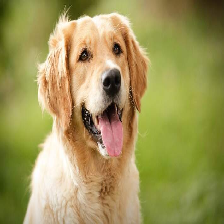

In [45]:
im=image.load_img('dog.jpg',target_size=(224,224))
im

In [46]:
X=image.img_to_array(im)
X

array([[[56., 64., 17.],
        [55., 63., 14.],
        [55., 63., 12.],
        ...,
        [44., 31., 15.],
        [43., 35., 14.],
        [43., 35., 14.]],

       [[54., 62., 15.],
        [54., 62., 13.],
        [54., 62., 11.],
        ...,
        [45., 32., 16.],
        [43., 35., 14.],
        [43., 35., 14.]],

       [[50., 58., 11.],
        [52., 60., 11.],
        [54., 62., 11.],
        ...,
        [47., 34., 17.],
        [44., 36., 15.],
        [44., 36., 15.]],

       ...,

       [[65., 77., 13.],
        [67., 79., 15.],
        [68., 80., 16.],
        ...,
        [81., 91., 31.],
        [81., 91., 38.],
        [80., 90., 37.]],

       [[64., 76., 12.],
        [66., 78., 14.],
        [67., 79., 15.],
        ...,
        [81., 91., 31.],
        [80., 90., 38.],
        [79., 89., 37.]],

       [[63., 75., 11.],
        [65., 77., 13.],
        [66., 78., 14.],
        ...,
        [81., 91., 31.],
        [79., 89., 37.],
        [78., 88., 36.]]

In [47]:
X=np.expand_dims(X,axis=0)
X

array([[[[56., 64., 17.],
         [55., 63., 14.],
         [55., 63., 12.],
         ...,
         [44., 31., 15.],
         [43., 35., 14.],
         [43., 35., 14.]],

        [[54., 62., 15.],
         [54., 62., 13.],
         [54., 62., 11.],
         ...,
         [45., 32., 16.],
         [43., 35., 14.],
         [43., 35., 14.]],

        [[50., 58., 11.],
         [52., 60., 11.],
         [54., 62., 11.],
         ...,
         [47., 34., 17.],
         [44., 36., 15.],
         [44., 36., 15.]],

        ...,

        [[65., 77., 13.],
         [67., 79., 15.],
         [68., 80., 16.],
         ...,
         [81., 91., 31.],
         [81., 91., 38.],
         [80., 90., 37.]],

        [[64., 76., 12.],
         [66., 78., 14.],
         [67., 79., 15.],
         ...,
         [81., 91., 31.],
         [80., 90., 38.],
         [79., 89., 37.]],

        [[63., 75., 11.],
         [65., 77., 13.],
         [66., 78., 14.],
         ...,
         [81., 91., 31.],
        

In [48]:
np.shape(X)

(1, 224, 224, 3)

In [49]:
X=preprocess_input(X)
X

array([[[[-86.939, -52.779, -67.68 ],
         [-89.939, -53.779, -68.68 ],
         [-91.939, -53.779, -68.68 ],
         ...,
         [-88.939, -85.779, -79.68 ],
         [-89.939, -81.779, -80.68 ],
         [-89.939, -81.779, -80.68 ]],

        [[-88.939, -54.779, -69.68 ],
         [-90.939, -54.779, -69.68 ],
         [-92.939, -54.779, -69.68 ],
         ...,
         [-87.939, -84.779, -78.68 ],
         [-89.939, -81.779, -80.68 ],
         [-89.939, -81.779, -80.68 ]],

        [[-92.939, -58.779, -73.68 ],
         [-92.939, -56.779, -71.68 ],
         [-92.939, -54.779, -69.68 ],
         ...,
         [-86.939, -82.779, -76.68 ],
         [-88.939, -80.779, -79.68 ],
         [-88.939, -80.779, -79.68 ]],

        ...,

        [[-90.939, -39.779, -58.68 ],
         [-88.939, -37.779, -56.68 ],
         [-87.939, -36.779, -55.68 ],
         ...,
         [-72.939, -25.779, -42.68 ],
         [-65.939, -25.779, -42.68 ],
         [-66.939, -26.779, -43.68 ]],

        [[

In [50]:
perdic=model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [51]:
perdic

array([[2.11204956e-08, 1.07684059e-07, 1.54022679e-08, 1.54291122e-08,
        1.50927839e-08, 2.58927724e-08, 1.22409620e-08, 3.18006613e-07,
        2.14989825e-07, 7.31047649e-08, 3.07339178e-06, 4.93418781e-07,
        1.67302403e-07, 1.70590440e-07, 2.82934536e-07, 6.12299189e-08,
        8.05756372e-07, 2.47147057e-07, 1.01694679e-08, 1.76709932e-07,
        2.74564620e-08, 1.86042911e-07, 4.13281036e-08, 4.78360619e-07,
        9.04746997e-08, 5.24071986e-08, 8.78851552e-08, 4.10825045e-08,
        1.03466348e-07, 4.25483648e-08, 1.61486433e-08, 4.61400234e-08,
        8.34392253e-08, 2.05443769e-08, 5.17597742e-09, 8.71657502e-09,
        4.75389683e-08, 3.07380503e-08, 4.43968950e-08, 3.20166968e-08,
        1.24677035e-06, 3.52302834e-07, 2.71764998e-06, 6.42696989e-08,
        6.53150494e-08, 1.58403111e-07, 2.02311426e-07, 7.59393970e-08,
        6.24658014e-08, 3.01969827e-08, 9.31351796e-09, 3.48167450e-09,
        4.16440059e-07, 1.00206918e-07, 3.01550251e-08, 1.175156

In [52]:
decode_predictions(perdic,top=1)

[[('n02099601', 'golden_retriever', np.float32(0.97815436))]]

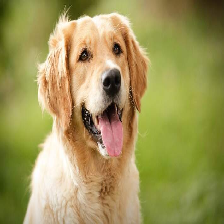

In [53]:
im2=image.load_img('Dog2.jpg',target_size=(224,224))
im

In [54]:
XX=image.img_to_array(im2)
XX

array([[[134., 162., 104.],
        [133., 164., 105.],
        [137., 167., 107.],
        ...,
        [112., 131.,  76.],
        [117., 138.,  82.],
        [121., 142.,  86.]],

       [[130., 159., 101.],
        [132., 163., 104.],
        [135., 166., 107.],
        ...,
        [114., 133.,  78.],
        [118., 139.,  83.],
        [121., 142.,  86.]],

       [[125., 159.,  99.],
        [128., 162., 102.],
        [130., 166., 105.],
        ...,
        [113., 134.,  78.],
        [119., 140.,  84.],
        [121., 142.,  86.]],

       ...,

       [[218., 234., 187.],
        [223., 236., 192.],
        [221., 237., 192.],
        ...,
        [197., 219., 147.],
        [196., 219., 149.],
        [202., 224., 162.]],

       [[219., 233., 182.],
        [219., 235., 190.],
        [218., 236., 188.],
        ...,
        [195., 221., 150.],
        [197., 218., 149.],
        [203., 223., 162.]],

       [[213., 231., 179.],
        [216., 232., 183.],
        [216., 2

In [55]:
np.shape(XX)

(224, 224, 3)

In [56]:
XX=np.expand_dims(XX,axis=0)
XX

array([[[[134., 162., 104.],
         [133., 164., 105.],
         [137., 167., 107.],
         ...,
         [112., 131.,  76.],
         [117., 138.,  82.],
         [121., 142.,  86.]],

        [[130., 159., 101.],
         [132., 163., 104.],
         [135., 166., 107.],
         ...,
         [114., 133.,  78.],
         [118., 139.,  83.],
         [121., 142.,  86.]],

        [[125., 159.,  99.],
         [128., 162., 102.],
         [130., 166., 105.],
         ...,
         [113., 134.,  78.],
         [119., 140.,  84.],
         [121., 142.,  86.]],

        ...,

        [[218., 234., 187.],
         [223., 236., 192.],
         [221., 237., 192.],
         ...,
         [197., 219., 147.],
         [196., 219., 149.],
         [202., 224., 162.]],

        [[219., 233., 182.],
         [219., 235., 190.],
         [218., 236., 188.],
         ...,
         [195., 221., 150.],
         [197., 218., 149.],
         [203., 223., 162.]],

        [[213., 231., 179.],
       

In [57]:
XX=preprocess_input(XX)

In [58]:
perdic2=model.predict(XX)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


In [59]:
decode_predictions(perdic2,top=1)


[[('n02101006', 'Gordon_setter', np.float32(0.44588658))]]

In [63]:
import cv2
cap=cv2.VideoCapture(0)
while True:
    ret,frame=cap.read()
    frame=cv2.resize(frame,(224,224))
    image=frame[...,::-1]
    image=np.expand_dims(image,axis=0)
    image=preprocess_input(image)
    predic=model.predict(image)
    name=decode_predictions(predic,top=1)[0][0][1]
    cv2.putText(frame,name,(30,30),cv2.FONT_HERSHEY_SIMPLEX,1.0,(0,0,0))
    cv2.imshow('webcam',frame)
    if cv2.waitKey(1) == 13 :
        break;
cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 